# Face detection

## OpenCV

### Loading the image

In [1]:
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
image = cv2.imread('/content/drive/MyDrive/face detection/img1.jpg')

In [5]:
image.shape

(408, 612, 3)

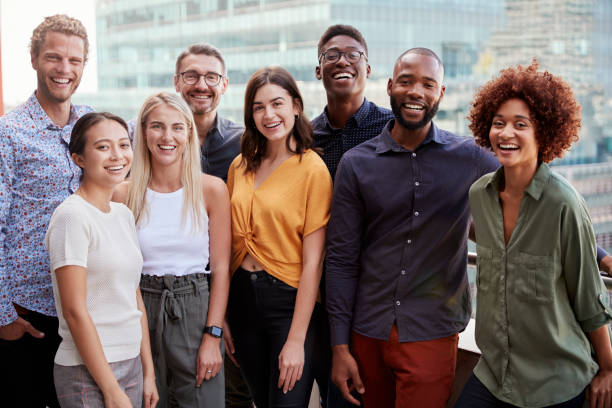

In [6]:
#cv2.imshow(image)
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [7]:
image = cv2.resize(image, (600, 400))
image.shape

(400, 600, 3)

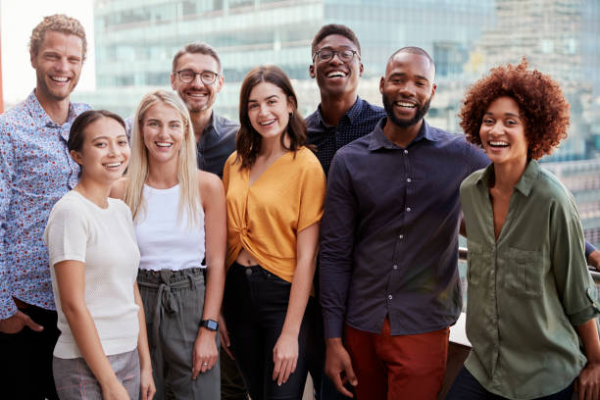

In [8]:
cv2_imshow(image)

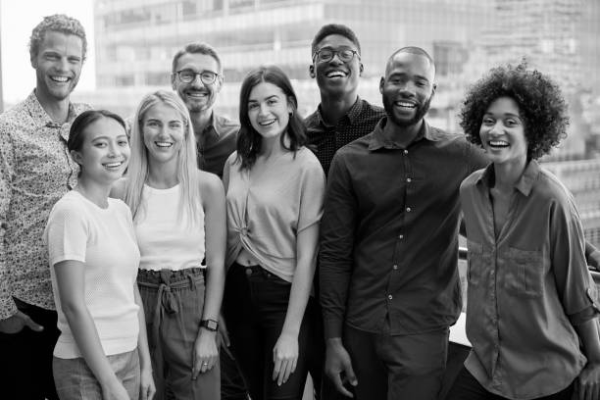

In [9]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_gray)

### Detecting faces

In [10]:
face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/face detection/haarcascade_frontalface_default.xml')

In [11]:
detections = face_detector.detectMultiScale(image_gray)

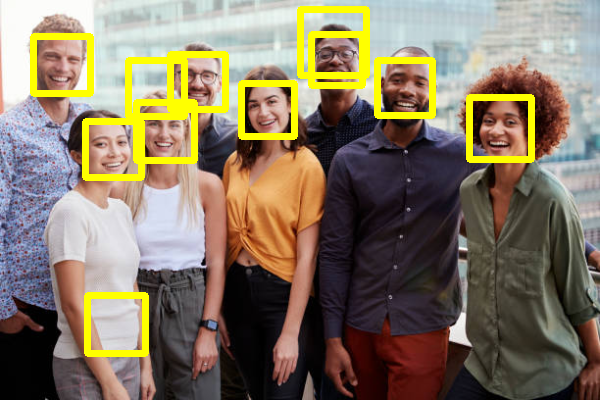

In [12]:
for (x, y, w, h) in detections:
  #print(x, y, w, h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,255), 5)
cv2_imshow(image)

### Haarcascade parameters

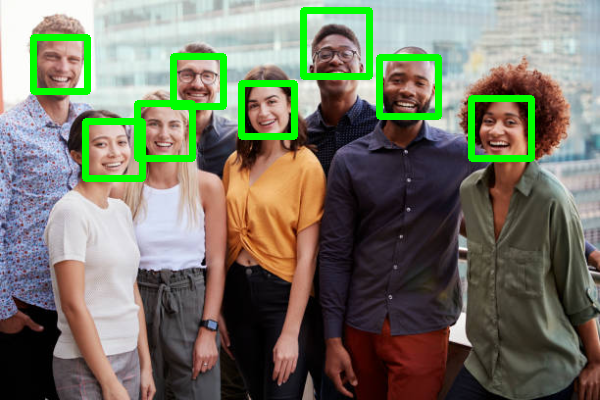

In [13]:
image = cv2.imread('/content/drive/MyDrive/face detection/img1.jpg')
image = cv2.resize(image, (600, 400))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = face_detector.detectMultiScale(image_gray, scaleFactor = 1.29)
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 5)
cv2_imshow(image)

#### Cars

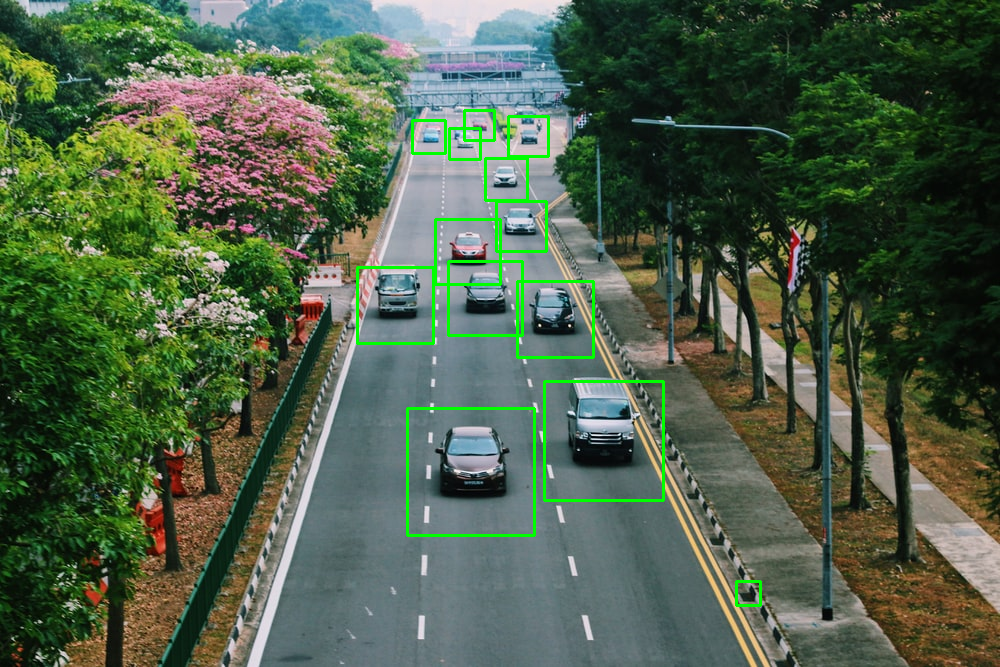

In [14]:
car_detector = cv2.CascadeClassifier('/content/drive/MyDrive/face detection/cars.xml')
image = cv2.imread('/content/drive/MyDrive/face detection/img3.jpeg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = car_detector.detectMultiScale(image_gray, scaleFactor = 1.03, minNeighbors=5)                                      
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

## Dlib

In [36]:
import dlib

### Detecting faces with HOG

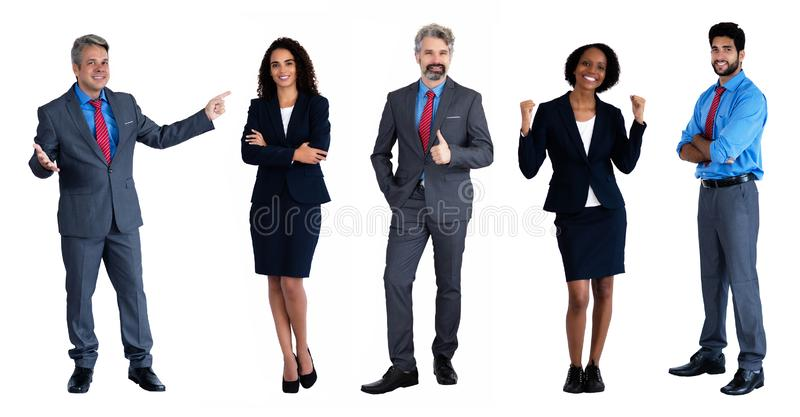

In [42]:
image = cv2.imread('/content/drive/MyDrive/face detection/img4.jpg')
cv2_imshow(image)

In [43]:
face_detector_hog = dlib.get_frontal_face_detector()

In [44]:
detections = face_detector_hog(image, 1)

In [45]:
detections, len(detections)

(rectangles[[(417, 42) (453, 78)], [(701, 34) (737, 70)], [(77, 50) (113, 86)], [(265, 54) (301, 90)], [(573, 54) (609, 90)]],
 5)

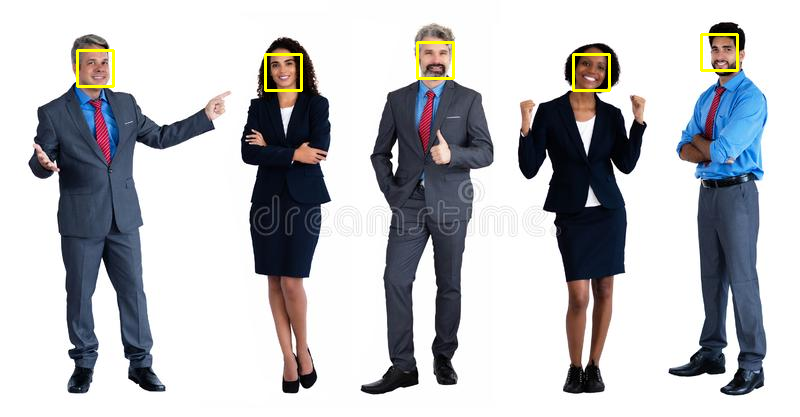

In [46]:
for face in detections:
  #print(face)
  #print(face.left())
  #print(face.top())
  #print(face.right())
  #print(face.bottom())
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (l, t), (r, b), (0, 255, 255), 2)
cv2_imshow(image)

### Detecting faces with CNN (Convolutional Neural Networks)

In [47]:
image = cv2.imread('/content/drive/MyDrive/face detection/img5.jpg')
cnn_detector = dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/face detection/mmod_human_face_detector.dat')

1.1440614461898804
1.137049913406372
1.1278995275497437
1.1200283765792847
1.1149375438690186
1.1131553649902344
1.0975688695907593
1.0942121744155884
1.085315227508545
1.0801889896392822
1.0800762176513672
1.0784764289855957
1.066403865814209
1.0641791820526123


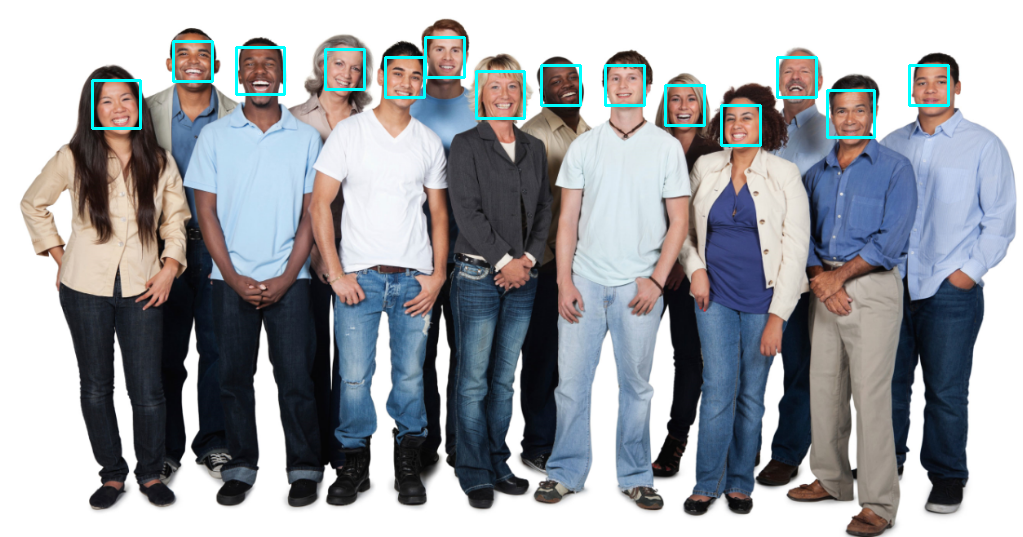

In [48]:
detections = cnn_detector(image, 1)
for face in detections:
  l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  print(c)
  cv2.rectangle(image, (l, t), (r, b), (255, 255, 0), 2)
cv2_imshow(image)